In [1]:
from sklearn import tree
import pandas as pd
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
import re
from nltk.stem import WordNetLemmatizer
from matplotlib import pyplot as plt
from wordcloud import WordCloud 

#for Coin value
from pycoingecko import CoinGeckoAPI
import json
from pandas import json_normalize
cg = CoinGeckoAPI()
gecko_list = [
    "bitcoin",
    "ethereum",
    "dogecoin"
]

In [2]:
eth = pd.read_csv(os.path.join("data", "ethereum_cleaned.csv"))
eth = eth.rename(columns={"Datetime":"date"})
eth['date'] = pd.to_datetime(eth['date'])
eth['date'] = eth['date'].dt.strftime('%Y-%m-%d')
eth

,Unnamed: 0,date,cleaned,negative,neutral,positive,comp
0,0,2022-05-01,"['eth', 'http', 'co', 'nolnum7c3k']",0.000,1.000,0.000,0.0000
1,1,2022-05-01,"['btc', 'xrp', 'xem', 'lisk', 'iost', 'sand', ...",0.000,0.725,0.275,0.5859
2,2,2022-05-01,"['eth', 'son', '3', 'dip', 'daha', 'yapacak', ...",0.000,1.000,0.000,0.0000
3,3,2022-05-01,"['tigray', 'emerg', 'famin', 'food', 'insecur'...",0.000,1.000,0.000,0.0000
4,4,2022-05-01,"['b', 'nu', 'binanc', 'live', 'nft', 'bnb', 'b...",0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...,...
160011,160011,2022-05-15,"['good', 'morn', 'crowd', 'nice', 'sunday', 'n...",0.000,0.612,0.388,0.6908
160012,160012,2022-05-15,"['curat', 'coin', 'metric', 'everi', 'day', 'e...",0.000,1.000,0.000,0.0000
160013,160013,2022-05-15,"['pari', '3', '1', '1', '10eth', 'belong', 'tr...",0.000,1.000,0.000,0.0000
160014,160014,2022-05-15,"['woman', 'maiprisin', 'http', 'co', 'gkcg5g6d...",0.000,1.000,0.000,0.0000


In [3]:
eth_neg = eth[eth['negative'] > 0.2]
eth_pos = eth[eth['positive'] > 0.2]

In [4]:
eth_pos

,Unnamed: 0,date,cleaned,negative,neutral,positive,comp
1,1,2022-05-01,"['btc', 'xrp', 'xem', 'lisk', 'iost', 'sand', ...",0.000,0.725,0.275,0.5859
9,9,2022-05-01,"['everyon', 'good', 'weekend', 'nftcommun', 'n...",0.000,0.707,0.293,0.4404
14,14,2022-05-01,"['en', 'sale', 'big', 'organ', 'growth', 'actu...",0.000,0.766,0.234,0.6705
16,16,2022-05-01,"['madv', 'apesnft', 'back', 'sneak', 'peek', '...",0.072,0.693,0.235,0.7269
19,19,2022-05-01,"['fanci', 'nft', 'nft', 'crypto', 'eth', 'poly...",0.000,0.783,0.217,0.5574
...,...,...,...,...,...,...,...
159937,159937,2022-05-15,"['hbar1000', 'network', 'apart', 'eth', 'seem'...",0.000,0.775,0.225,0.4404
159949,159949,2022-05-15,"['free', 'nft', 'giveaway', 'win', '1', 'follo...",0.049,0.585,0.365,0.9260
159974,159974,2022-05-15,"['sassal0x', 'see', 'gener', 'valuat', 'declin...",0.000,0.763,0.237,0.8126
160005,160005,2022-05-15,"['uniqu', 'modern', 'win', 'win', 'trade', 'st...",0.000,0.648,0.352,0.8225


In [5]:
print(len(eth_neg))
print(len(eth_pos))

4735
17816


In [6]:
positive = eth_pos['cleaned']


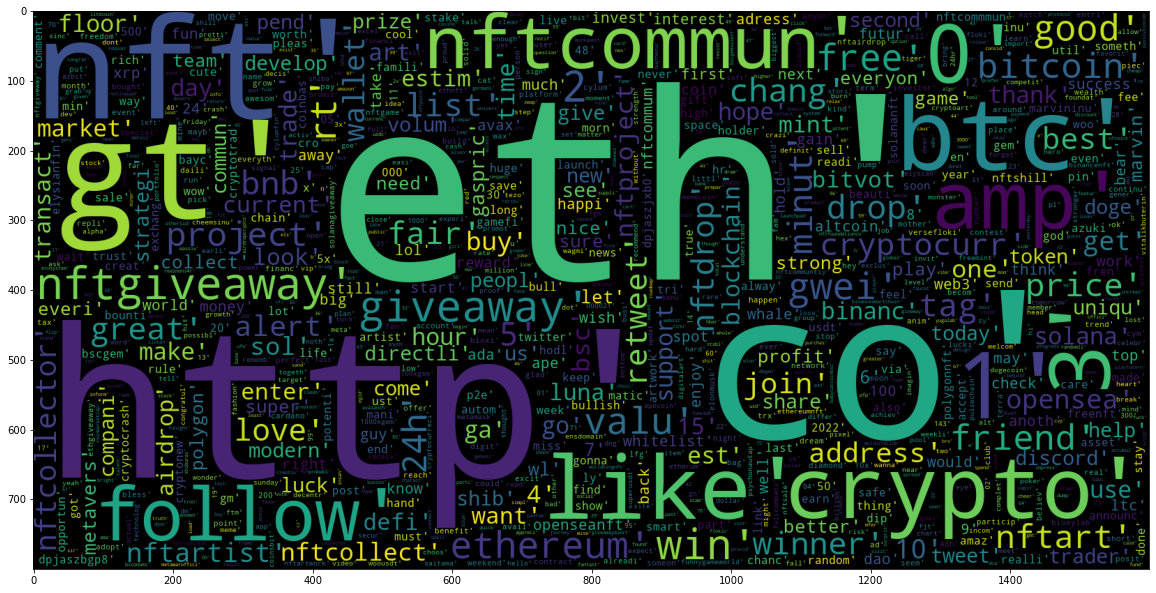

In [7]:
positive = eth_pos['cleaned']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(positive))
plt.imshow(wc)

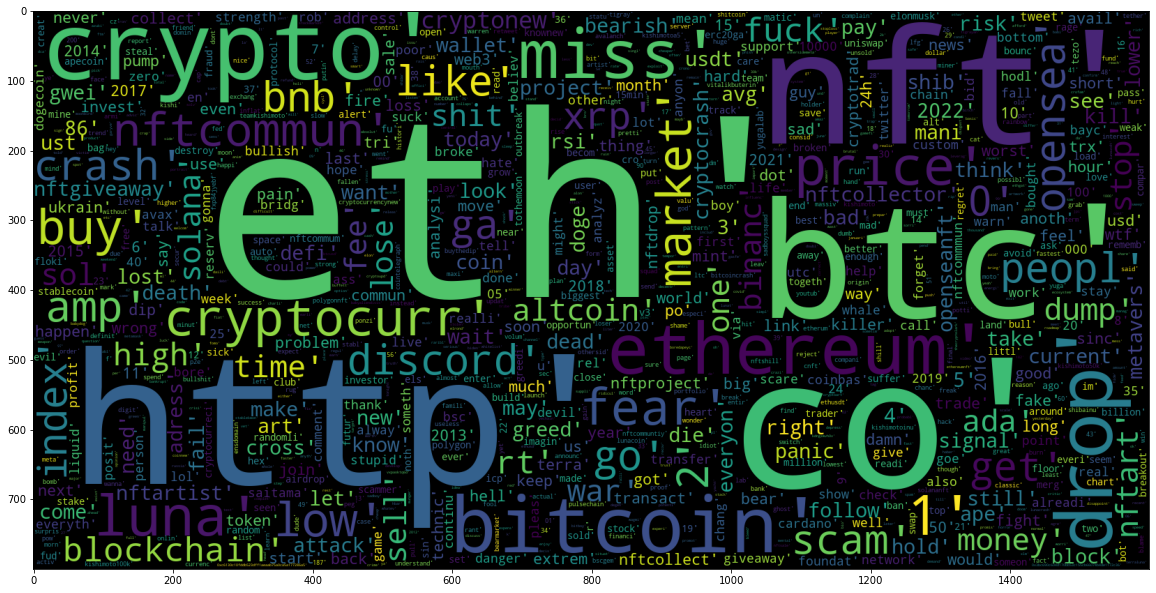

In [8]:
negative = eth_neg['cleaned']
plt.figure(figsize = (20,20))
wc2 = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(negative))
plt.imshow(wc2)

In [9]:
##asigning value to positive, negative and neutral, negative(0), neutral(1), positive(2)
sentiment0=[]
for i in range(len(eth)):
    if eth.loc[i,'negative']>0:
        sentiment0+=[0]
    elif eth.loc[i,'positive']>0:
        sentiment0+=[2]        
    else:
        sentiment0+=[1]     

In [10]:
eth['sentiment']=sentiment0
eth['sentiment'].value_counts()

eth.head()

,Unnamed: 0,date,cleaned,negative,neutral,positive,comp,sentiment
0,0,2022-05-01,"['eth', 'http', 'co', 'nolnum7c3k']",0.0,1.000,0.000,0.0000,1
1,1,2022-05-01,"['btc', 'xrp', 'xem', 'lisk', 'iost', 'sand', ...",0.0,0.725,0.275,0.5859,2
2,2,2022-05-01,"['eth', 'son', '3', 'dip', 'daha', 'yapacak', ...",0.0,1.000,0.000,0.0000,1
3,3,2022-05-01,"['tigray', 'emerg', 'famin', 'food', 'insecur'...",0.0,1.000,0.000,0.0000,1
4,4,2022-05-01,"['b', 'nu', 'binanc', 'live', 'nft', 'bnb', 'b...",0.0,1.000,0.000,0.0000,1


In [11]:
target = eth["cleaned"]
target_names = eth[["sentiment"]]

# This section is to extract the value of Ethereum (plus Dodge and Bitcoin)

In [12]:
crypto = pd.read_csv(os.path.join("Data", "price.csv"))

In [13]:
crypto

,Unnamed: 0,bitcoin_price,ethereum_price,dogecoin_price,date,bitcoin_volume,ethereum_volume,dogecoin_volume
0,0,14884.979992,328.653136,0.003901,2020-05-19,5.967659e+10,2.045635e+10,3.159139e+08
1,1,14922.865925,326.538524,0.003891,2020-05-20,5.668974e+10,1.561838e+10,1.867668e+08
2,2,14452.798040,318.473767,0.003781,2020-05-21,5.283982e+10,1.582295e+10,1.764923e+08
3,3,13795.940128,302.899061,0.003681,2020-05-22,5.476526e+10,1.234986e+10,2.064283e+08
4,4,13971.494350,315.525952,0.003858,2020-05-23,4.238211e+10,1.627442e+10,2.184323e+08
...,...,...,...,...,...,...,...,...
725,725,42267.741872,2898.843244,0.127568,2022-05-14,1.031672e+11,3.457985e+10,1.679408e+09
726,726,43534.739233,2976.736395,0.129823,2022-05-15,3.714673e+10,2.075952e+10,9.658377e+08
727,727,45069.769903,3089.689306,0.134079,2022-05-16,3.302329e+10,2.071565e+10,7.538429e+08
728,728,42910.751665,2905.144652,0.126187,2022-05-17,4.075195e+10,2.877878e+10,7.785160e+08


In [14]:
crypto['Change ETH'] = crypto.ethereum_price - crypto.ethereum_price.shift(1)
crypto

,Unnamed: 0,bitcoin_price,ethereum_price,dogecoin_price,date,bitcoin_volume,ethereum_volume,dogecoin_volume,Change ETH
0,0,14884.979992,328.653136,0.003901,2020-05-19,5.967659e+10,2.045635e+10,3.159139e+08,NaN
1,1,14922.865925,326.538524,0.003891,2020-05-20,5.668974e+10,1.561838e+10,1.867668e+08,-2.114613
2,2,14452.798040,318.473767,0.003781,2020-05-21,5.283982e+10,1.582295e+10,1.764923e+08,-8.064757
3,3,13795.940128,302.899061,0.003681,2020-05-22,5.476526e+10,1.234986e+10,2.064283e+08,-15.574706
4,4,13971.494350,315.525952,0.003858,2020-05-23,4.238211e+10,1.627442e+10,2.184323e+08,12.626890
...,...,...,...,...,...,...,...,...,...
725,725,42267.741872,2898.843244,0.127568,2022-05-14,1.031672e+11,3.457985e+10,1.679408e+09,37.065846
726,726,43534.739233,2976.736395,0.129823,2022-05-15,3.714673e+10,2.075952e+10,9.658377e+08,77.893151
727,727,45069.769903,3089.689306,0.134079,2022-05-16,3.302329e+10,2.071565e+10,7.538429e+08,112.952912
728,728,42910.751665,2905.144652,0.126187,2022-05-17,4.075195e+10,2.877878e+10,7.785160e+08,-184.544654


In [15]:
crypto.reset_index(inplace=True)
crypto = crypto.drop(['index'], axis = 1)
crypto['date'] = pd.to_datetime(crypto['date'])
crypto['date'] = crypto['date'].dt.strftime('%Y-%m-%d')
crypto

,Unnamed: 0,bitcoin_price,ethereum_price,dogecoin_price,date,bitcoin_volume,ethereum_volume,dogecoin_volume,Change ETH
0,0,14884.979992,328.653136,0.003901,2020-05-19,5.967659e+10,2.045635e+10,3.159139e+08,NaN
1,1,14922.865925,326.538524,0.003891,2020-05-20,5.668974e+10,1.561838e+10,1.867668e+08,-2.114613
2,2,14452.798040,318.473767,0.003781,2020-05-21,5.283982e+10,1.582295e+10,1.764923e+08,-8.064757
3,3,13795.940128,302.899061,0.003681,2020-05-22,5.476526e+10,1.234986e+10,2.064283e+08,-15.574706
4,4,13971.494350,315.525952,0.003858,2020-05-23,4.238211e+10,1.627442e+10,2.184323e+08,12.626890
...,...,...,...,...,...,...,...,...,...
725,725,42267.741872,2898.843244,0.127568,2022-05-14,1.031672e+11,3.457985e+10,1.679408e+09,37.065846
726,726,43534.739233,2976.736395,0.129823,2022-05-15,3.714673e+10,2.075952e+10,9.658377e+08,77.893151
727,727,45069.769903,3089.689306,0.134079,2022-05-16,3.302329e+10,2.071565e+10,7.538429e+08,112.952912
728,728,42910.751665,2905.144652,0.126187,2022-05-17,4.075195e+10,2.877878e+10,7.785160e+08,-184.544654


In [16]:
crypto['ETH Up/Down'] = np.where(crypto['Change ETH']>0, 1, 0)
crypto

,Unnamed: 0,bitcoin_price,ethereum_price,dogecoin_price,date,bitcoin_volume,ethereum_volume,dogecoin_volume,Change ETH,ETH Up/Down
0,0,14884.979992,328.653136,0.003901,2020-05-19,5.967659e+10,2.045635e+10,3.159139e+08,NaN,0
1,1,14922.865925,326.538524,0.003891,2020-05-20,5.668974e+10,1.561838e+10,1.867668e+08,-2.114613,0
2,2,14452.798040,318.473767,0.003781,2020-05-21,5.283982e+10,1.582295e+10,1.764923e+08,-8.064757,0
3,3,13795.940128,302.899061,0.003681,2020-05-22,5.476526e+10,1.234986e+10,2.064283e+08,-15.574706,0
4,4,13971.494350,315.525952,0.003858,2020-05-23,4.238211e+10,1.627442e+10,2.184323e+08,12.626890,1
...,...,...,...,...,...,...,...,...,...,...
725,725,42267.741872,2898.843244,0.127568,2022-05-14,1.031672e+11,3.457985e+10,1.679408e+09,37.065846,1
726,726,43534.739233,2976.736395,0.129823,2022-05-15,3.714673e+10,2.075952e+10,9.658377e+08,77.893151,1
727,727,45069.769903,3089.689306,0.134079,2022-05-16,3.302329e+10,2.071565e+10,7.538429e+08,112.952912,1
728,728,42910.751665,2905.144652,0.126187,2022-05-17,4.075195e+10,2.877878e+10,7.785160e+08,-184.544654,0


# Sentiment Analysis - Starts Here

In [17]:
eth1 = eth.drop(columns=["Unnamed: 0"], axis = 1)
eth1

,date,cleaned,negative,neutral,positive,comp,sentiment
0,2022-05-01,"['eth', 'http', 'co', 'nolnum7c3k']",0.000,1.000,0.000,0.0000,1
1,2022-05-01,"['btc', 'xrp', 'xem', 'lisk', 'iost', 'sand', ...",0.000,0.725,0.275,0.5859,2
2,2022-05-01,"['eth', 'son', '3', 'dip', 'daha', 'yapacak', ...",0.000,1.000,0.000,0.0000,1
3,2022-05-01,"['tigray', 'emerg', 'famin', 'food', 'insecur'...",0.000,1.000,0.000,0.0000,1
4,2022-05-01,"['b', 'nu', 'binanc', 'live', 'nft', 'bnb', 'b...",0.000,1.000,0.000,0.0000,1
...,...,...,...,...,...,...,...
160011,2022-05-15,"['good', 'morn', 'crowd', 'nice', 'sunday', 'n...",0.000,0.612,0.388,0.6908,2
160012,2022-05-15,"['curat', 'coin', 'metric', 'everi', 'day', 'e...",0.000,1.000,0.000,0.0000,1
160013,2022-05-15,"['pari', '3', '1', '1', '10eth', 'belong', 'tr...",0.000,1.000,0.000,0.0000,1
160014,2022-05-15,"['woman', 'maiprisin', 'http', 'co', 'gkcg5g6d...",0.000,1.000,0.000,0.0000,1


In [18]:
eth1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160016 entries, 0 to 160015
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   date       160016 non-null  object 
 1   cleaned    160016 non-null  object 
 2   negative   160016 non-null  float64
 3   neutral    160016 non-null  float64
 4   positive   160016 non-null  float64
 5   comp       160016 non-null  float64
 6   sentiment  160016 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 8.5+ MB


In [19]:
eth1.dtypes

date          object
cleaned       object
negative     float64
neutral      float64
positive     float64
comp         float64
sentiment      int64
dtype: object

In [20]:
np.sum(eth1.isnull().any(axis=1))

0

In [21]:
print('Count of columns in the data is: ', len(eth1.columns))
print('Count of rows in the data is: ', len(eth1))

Count of columns in the data is:  7
Count of rows in the data is:  160016


In [22]:
eth1['sentiment'].unique()

array([1, 2, 0], dtype=int64)

In [23]:
eth1['sentiment'].nunique()

3

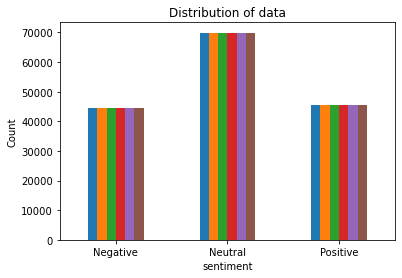

In [24]:
# Plotting the distribution for dataset.
ax = eth1.groupby('sentiment').count().plot(kind='bar', title='Distribution of data',legend=False, ylabel="Count")
ax.set_xticklabels(['Negative','Neutral','Positive'], rotation=0)
# Storing data in lists.
text, sentiment = list(eth1['cleaned']), list(eth1['sentiment'])
plt.savefig("images/eth_sentiment_distribution.png")

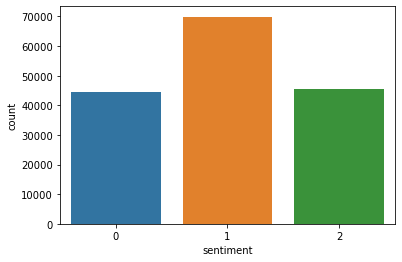

In [25]:
import seaborn as sns
sns.countplot(x='sentiment', data=eth1)
plt.savefig("images/eth_sentiment_distribution2.png")

In [26]:
data = eth1[['cleaned', 'sentiment']]
data

,cleaned,sentiment
0,"['eth', 'http', 'co', 'nolnum7c3k']",1
1,"['btc', 'xrp', 'xem', 'lisk', 'iost', 'sand', ...",2
2,"['eth', 'son', '3', 'dip', 'daha', 'yapacak', ...",1
3,"['tigray', 'emerg', 'famin', 'food', 'insecur'...",1
4,"['b', 'nu', 'binanc', 'live', 'nft', 'bnb', 'b...",1
...,...,...
160011,"['good', 'morn', 'crowd', 'nice', 'sunday', 'n...",2
160012,"['curat', 'coin', 'metric', 'everi', 'day', 'e...",1
160013,"['pari', '3', '1', '1', '10eth', 'belong', 'tr...",1
160014,"['woman', 'maiprisin', 'http', 'co', 'gkcg5g6d...",1


In [27]:
data['sentiment'].unique()

array([1, 2, 0], dtype=int64)

In [28]:
#Separating the postivie and negative tweets
data_pos = data[data['sentiment'] == 2]
data_neg = data[data['sentiment'] == 0]

In [29]:
data_pos = data_pos.iloc[:int(20000)]
data_neg = data_neg.iloc[:int(20000)]

In [30]:
dataset = pd.concat([data_pos, data_neg])
dataset

,cleaned,sentiment
1,"['btc', 'xrp', 'xem', 'lisk', 'iost', 'sand', ...",2
6,"['4', 'hour', 'top', 'mover', 'report', 'block...",2
7,"['degousdt', 'bear', 'alert', '5x', 'volum', '...",2
9,"['everyon', 'good', 'weekend', 'nftcommun', 'n...",2
12,"['nft', 'collab', 'degenladybug', 'x', 'thelot...",2
...,...,...
70804,"['bitcoin', 'last', 'price', '35224', 'btc', '...",0
70805,"['troy', 'show', 'unusu', 'activ', 'keep', 'wa...",0
70806,"['mva', 'element', 'big', 'buy', 'drink', 'ran...",0
70807,"['bitcoin', 'last', 'price', '35263', 'btc', '...",0


In [31]:
dataset['cleaned']=dataset['cleaned'].str.lower()
dataset['cleaned'].tail()

70804    ['bitcoin', 'last', 'price', '35224', 'btc', '...
70805    ['troy', 'show', 'unusu', 'activ', 'keep', 'wa...
70806    ['mva', 'element', 'big', 'buy', 'drink', 'ran...
70807    ['bitcoin', 'last', 'price', '35263', 'btc', '...
70808    ['may', '07', '22', '00', 'utc', 'bearish', 's...
Name: cleaned, dtype: object

In [32]:
##Cleaning and removing STOPWORDS

stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [33]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['cleaned'] = dataset['cleaned'].apply(lambda text: cleaning_stopwords(text))
dataset['cleaned'].head()

1     ['btc', 'xrp', 'xem', 'lisk', 'iost', 'sand', ...
6     ['4', 'hour', 'top', 'mover', 'report', 'block...
7     ['degousdt', 'bear', 'alert', '5x', 'volum', '...
9     ['everyon', 'good', 'weekend', 'nftcommun', 'n...
12    ['nft', 'collab', 'degenladybug', 'x', 'thelot...
Name: cleaned, dtype: object

In [34]:
#Cleaning and removing punctuations
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['cleaned']= dataset['cleaned'].apply(lambda x: cleaning_punctuations(x))
dataset['cleaned'].tail()

70804    bitcoin last price 35224 btc daili indic rsi 3...
70805    troy show unusu activ keep watchlist gain mome...
70806    mva element big buy drink rank 36 2 3 7 5 0 ve...
70807    bitcoin last price 35263 btc daili indic rsi 3...
70808    may 07 22 00 utc bearish signal dodo usdt deat...
Name: cleaned, dtype: object

In [35]:
#Cleaning and removing repeating characters
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['cleaned'] = dataset['cleaned'].apply(lambda x: cleaning_repeating_char(x))
dataset['cleaned'].tail()

70804    bitcoin last price 35224 btc daili indic rsi 3...
70805    troy show unusu activ keep watchlist gain mome...
70806    mva element big buy drink rank 36 2 3 7 5 0 ve...
70807    bitcoin last price 35263 btc daili indic rsi 3...
70808    may 07 22 00 utc bearish signal dodo usdt deat...
Name: cleaned, dtype: object

In [36]:
#Cleaning and removing URLs
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['cleaned'] = dataset['cleaned'].apply(lambda x: cleaning_URLs(x))
dataset['cleaned'].tail()

70804    bitcoin last price 35224 btc daili indic rsi 3...
70805    troy show unusu activ keep watchlist gain mome...
70806    mva element big buy drink rank 36 2 3 7 5 0 ve...
70807    bitcoin last price 35263 btc daili indic rsi 3...
70808    may 07 22 00 utc bearish signal dodo usdt deat...
Name: cleaned, dtype: object

In [37]:
#Cleaning numbers out
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['cleaned'] = dataset['cleaned'].apply(lambda x: cleaning_numbers(x))
dataset['cleaned'].tail()

70804    bitcoin last price  btc daili indic rsi       ...
70805    troy show unusu activ keep watchlist gain mome...
70806    mva element big buy drink rank       vet water...
70807    bitcoin last price  btc daili indic rsi       ...
70808    may    utc bearish signal dodo usdt death cros...
Name: cleaned, dtype: object

In [38]:
#appllying stemming
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['cleaned']= dataset['cleaned'].apply(lambda x: stemming_on_text(x))
dataset['cleaned'].head()

1        btc xrp xem lisk iost sand trx btt win sfp eth
6      hour top mover report blockchain crypto crypt...
7     degousdt bear alert x volum price    min  volu...
9     everyon good weekend nftcommun nft eth glitchn...
12    nft collab degenladybug x thelottonft partner ...
Name: cleaned, dtype: object

In [39]:
#applying lemmatizer
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
dataset['cleaned'] = dataset['cleaned'].apply(lambda x: lemmatizer_on_text(x))
dataset['cleaned'].head()

1        btc xrp xem lisk iost sand trx btt win sfp eth
6      hour top mover report blockchain crypto crypt...
7     degousdt bear alert x volum price    min  volu...
9     everyon good weekend nftcommun nft eth glitchn...
12    nft collab degenladybug x thelottonft partner ...
Name: cleaned, dtype: object

In [40]:
X=dataset.cleaned
y=dataset.sentiment

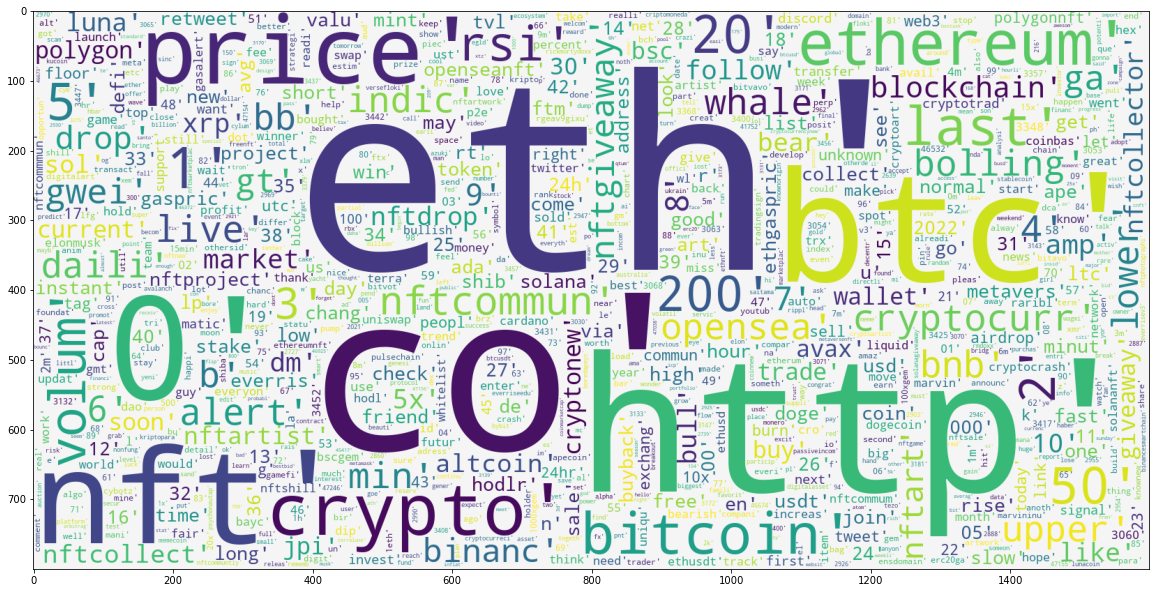

In [41]:
data_neg = data['cleaned'][:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False, background_color = "whitesmoke").generate(" ".join(data_neg))
plt.imshow(wc)
plt.savefig("images/eth_negative_worldcloud.png")

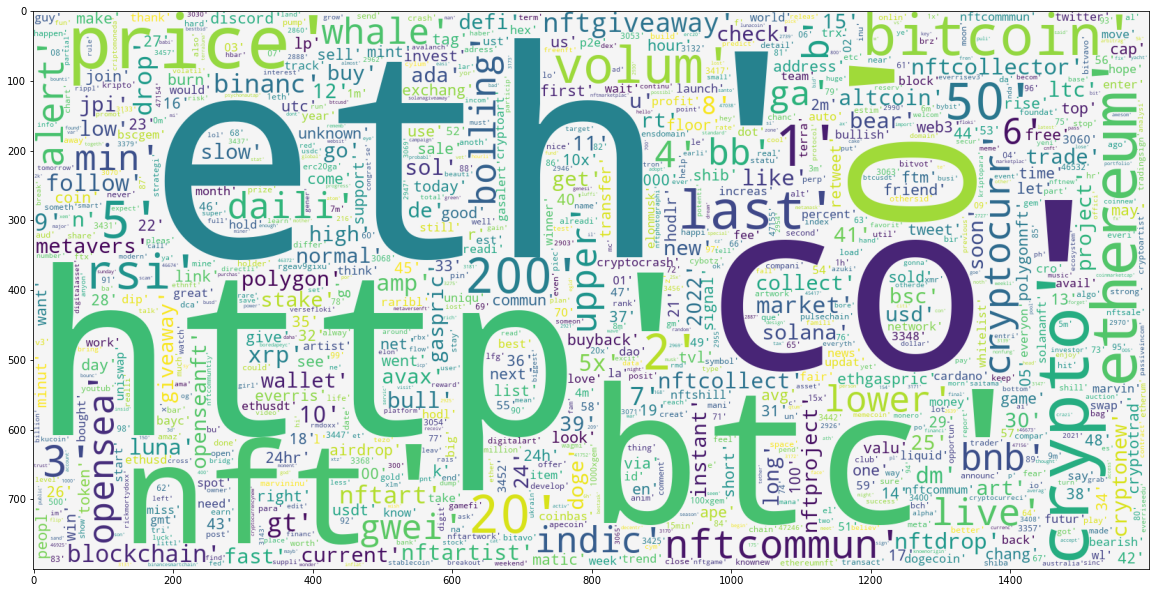

In [42]:
data_pos = data['cleaned'][:800000]
plt.figure(figsize = (20,20))
wc2 = WordCloud(max_words = 1000 , background_color='whitesmoke',width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc2)
plt.savefig("images/eth_positive_worldcloud.png")

In [43]:
# Separating the 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(target, target_names,test_size = 0.05, random_state = 42)

In [44]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=600000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  600000


In [45]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [46]:
def model_Evaluate(model):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    cf_matrix = confusion_matrix(y_test, y_pred)
    
    sentiment = ['Negative','Neutral', 'Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, cmap = 'Blues', annot=True, fmt='d',
                xticklabels = sentiment, yticklabels = sentiment)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

C:\Users\Cheng\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0       0.99      0.62      0.76      2195
           1       0.81      0.98      0.88      3494
           2       0.81      0.83      0.82      2312

    accuracy                           0.84      8001
   macro avg       0.87      0.81      0.82      8001
weighted avg       0.86      0.84      0.83      8001



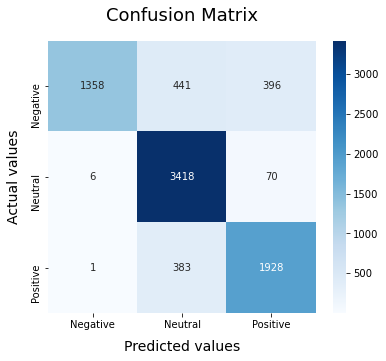

In [47]:
BNBmodel = BernoulliNB()
plt.figure(figsize = (6,5))
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)
plt.savefig("images/eth_confusion_matrix.png")

# Sentiment vs Crypto Price analysis start here

In [48]:
eth1

,date,cleaned,negative,neutral,positive,comp,sentiment
0,2022-05-01,"['eth', 'http', 'co', 'nolnum7c3k']",0.000,1.000,0.000,0.0000,1
1,2022-05-01,"['btc', 'xrp', 'xem', 'lisk', 'iost', 'sand', ...",0.000,0.725,0.275,0.5859,2
2,2022-05-01,"['eth', 'son', '3', 'dip', 'daha', 'yapacak', ...",0.000,1.000,0.000,0.0000,1
3,2022-05-01,"['tigray', 'emerg', 'famin', 'food', 'insecur'...",0.000,1.000,0.000,0.0000,1
4,2022-05-01,"['b', 'nu', 'binanc', 'live', 'nft', 'bnb', 'b...",0.000,1.000,0.000,0.0000,1
...,...,...,...,...,...,...,...
160011,2022-05-15,"['good', 'morn', 'crowd', 'nice', 'sunday', 'n...",0.000,0.612,0.388,0.6908,2
160012,2022-05-15,"['curat', 'coin', 'metric', 'everi', 'day', 'e...",0.000,1.000,0.000,0.0000,1
160013,2022-05-15,"['pari', '3', '1', '1', '10eth', 'belong', 'tr...",0.000,1.000,0.000,0.0000,1
160014,2022-05-15,"['woman', 'maiprisin', 'http', 'co', 'gkcg5g6d...",0.000,1.000,0.000,0.0000,1


In [49]:
crypto

,Unnamed: 0,bitcoin_price,ethereum_price,dogecoin_price,date,bitcoin_volume,ethereum_volume,dogecoin_volume,Change ETH,ETH Up/Down
0,0,14884.979992,328.653136,0.003901,2020-05-19,5.967659e+10,2.045635e+10,3.159139e+08,NaN,0
1,1,14922.865925,326.538524,0.003891,2020-05-20,5.668974e+10,1.561838e+10,1.867668e+08,-2.114613,0
2,2,14452.798040,318.473767,0.003781,2020-05-21,5.283982e+10,1.582295e+10,1.764923e+08,-8.064757,0
3,3,13795.940128,302.899061,0.003681,2020-05-22,5.476526e+10,1.234986e+10,2.064283e+08,-15.574706,0
4,4,13971.494350,315.525952,0.003858,2020-05-23,4.238211e+10,1.627442e+10,2.184323e+08,12.626890,1
...,...,...,...,...,...,...,...,...,...,...
725,725,42267.741872,2898.843244,0.127568,2022-05-14,1.031672e+11,3.457985e+10,1.679408e+09,37.065846,1
726,726,43534.739233,2976.736395,0.129823,2022-05-15,3.714673e+10,2.075952e+10,9.658377e+08,77.893151,1
727,727,45069.769903,3089.689306,0.134079,2022-05-16,3.302329e+10,2.071565e+10,7.538429e+08,112.952912,1
728,728,42910.751665,2905.144652,0.126187,2022-05-17,4.075195e+10,2.877878e+10,7.785160e+08,-184.544654,0


In [50]:
eth_sentiment = eth1.groupby('date')['sentiment'].mean()
eth_sentiment = eth_sentiment.reset_index()
eth_sentiment

,date,sentiment
0,2022-05-01,0.985601
1,2022-05-02,1.033497
2,2022-05-03,1.033497
3,2022-05-04,1.024498
4,2022-05-05,1.035296
5,2022-05-06,1.009999
6,2022-05-07,0.914609
7,2022-05-08,1.004800
8,2022-05-09,1.025097
9,2022-05-10,1.013399


In [51]:
eth_price_sen = pd.merge(eth_sentiment, crypto,how='outer', on='date')

In [52]:
eth_clean1 = eth_price_sen.dropna(subset=['sentiment'])

<Figure size 720x720 with 0 Axes>

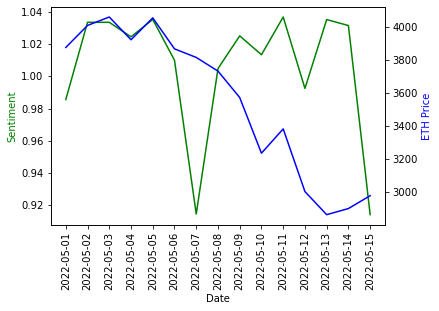

In [53]:
x = eth_clean1["date"]
y1 = eth_clean1["sentiment"]
y2 = eth_clean1["ethereum_price"]
plt.figure(figsize = (10,10))
fig, ax1 = plt.subplots()
plt.xticks(rotation = 90)
ax2 = ax1.twinx()

ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment', color='g')
ax2.set_ylabel('ETH Price', color='b')

plt.savefig("images/eth_sentiment_price.png",bbox_inches='tight')
plt.show()

In [54]:
eth2 = eth_clean1[(eth_clean1['date'] > '2022-04-30') & (eth_clean1['date'] < '2022-05-16')]
eth2

,date,sentiment,Unnamed: 0,bitcoin_price,ethereum_price,dogecoin_price,bitcoin_volume,ethereum_volume,dogecoin_volume,Change ETH,ETH Up/Down
0,2022-05-01,0.985601,712,53518.018858,3874.650573,0.180779,2.965347e+10,1.785574e+10,1.206468e+09,-112.235667,0
1,2022-05-02,1.033497,713,54531.860549,4008.085357,0.188247,3.517429e+10,2.050259e+10,1.306821e+09,133.434784,1
2,2022-05-03,1.033497,714,54709.645087,4059.288782,0.186066,4.231498e+10,2.511270e+10,1.018619e+09,51.203425,1
3,2022-05-04,1.024498,715,53180.614016,3921.344785,0.182778,3.249291e+10,1.806705e+10,7.256790e+08,-137.943997,0
4,2022-05-05,1.035296,716,54702.555595,4053.948028,0.187391,4.374783e+10,2.388912e+10,1.048635e+09,132.603243,1
5,2022-05-06,1.009999,717,51400.311798,3866.281839,0.180483,5.250914e+10,2.929791e+10,1.573665e+09,-187.666189,0
6,2022-05-07,0.914609,718,51026.289235,3814.224690,0.180969,4.552599e+10,2.898637e+10,1.233530e+09,-52.057149,0
7,2022-05-08,1.004800,719,50259.004275,3731.605078,0.180549,2.702844e+10,1.770002e+10,1.007459e+09,-82.619612,0
8,2022-05-09,1.025097,720,48329.555540,3571.264784,0.176215,4.370554e+10,2.919468e+10,9.566095e+08,-160.340294,0
9,2022-05-10,1.013399,721,43512.077206,3234.184510,0.151046,8.390590e+10,4.943897e+10,1.727538e+09,-337.080274,0


<Figure size 432x288 with 0 Axes>

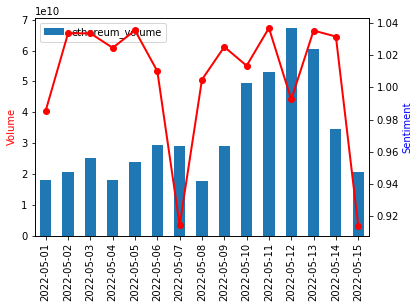

In [58]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = eth2[['ethereum_volume']].plot(kind='bar', use_index=True)
ax2 = ax.twinx()
# ax.set_yticklabels(btc['bitcoin_volume'])
ax.set_ylabel('Volume', color='r')
ax2.set_ylabel('Sentiment', color='b')


ax.set_xticklabels(eth2['date'], rotation=90)
ax2.plot(eth2[['sentiment']].values, linestyle='-', marker='o', linewidth=2.0, color="red")
plt.savefig("images/ethvolume.png")